<a href="https://colab.research.google.com/github/javasalfredabyp/capstone/blob/main/Freshandstalefruit_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
!ls

 agrostock_model				   model-agrostock2.h5
'Apel bosok2.jpg'				   model-agrostock3.h5
'apel segar2.jpg'				   model-agrostock4.h5
 bg4.jpg					   model-agrostock7.h5
 cap1.jpg					   model-agrostock8.h5
 fresh-and-stale-images-of-fruits-and-vegetables   model-agrostock.h3
 fresh-stale-fruit				   model-agrostock.h5
 fruits-fresh-and-rotten-for-classification	   model.json
'jeruk busuk2.jpg'				   Tomat.jpg
 kaggle.json


In [ ]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

 99% 1.40G/1.41G [00:44<00:00, 15.6MB/s]
100% 1.41G/1.41G [00:44<00:00, 34.2MB/s]


In [ ]:
!mkdir fresh-and-stale-images-of-fruits-and-vegetables
!mv fresh-and-stale-images-of-fruits-and-vegetables.zip fresh-and-stale-images-of-fruits-and-vegetables

mkdir: cannot create directory ‘fresh-and-stale-images-of-fruits-and-vegetables’: File exists


In [ ]:
%cd fresh-and-stale-images-of-fruits-and-vegetables

/content/gdrive/My Drive/kaggle_dataset/fresh-and-stale-images-of-fruits-and-vegetables


In [ ]:
!unzip fresh-and-stale-images-of-fruits-and-vegetables.zip

Streaming output truncated to the last 5000 lines.
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.09 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.15 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.24 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.32 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.38 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.21 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.27 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.33 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.40 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.56 PM.png  
  inflating: stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.07.04 PM.png  
  inflating: stale_banana/rotated_by

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import pathlib
data_dir = '/content/gdrive/My Drive/kaggle_dataset/fresh-and-stale-images-of-fruits-and-vegetables'
data_dir = pathlib.Path(data_dir)

In [ ]:
print(data_dir)

/content/gdrive/My Drive/kaggle_dataset/fresh-and-stale-images-of-fruits-and-vegetables


In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

10144


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

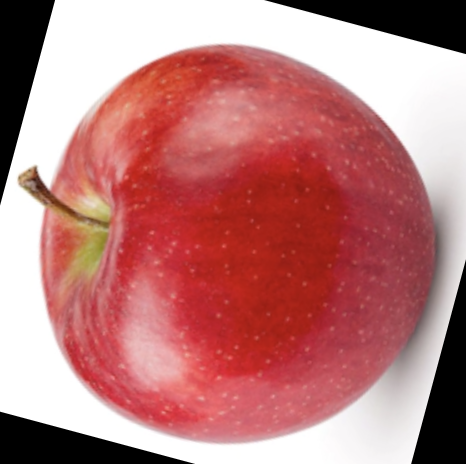

In [ ]:
fresh_apple = list(data_dir.glob('fresh_apple/*'))
PIL.Image.open(str(fresh_apple[0]))

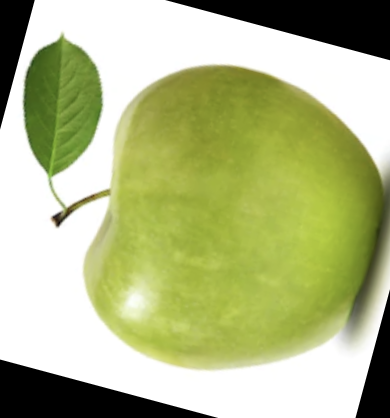

In [ ]:
fresh_apple = list(data_dir.glob('fresh_apple/*'))
PIL.Image.open(str(fresh_apple[1]))

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10154 files belonging to 6 classes.
Using 8124 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10154 files belonging to 6 classes.
Using 2030 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['fresh_apple', 'fresh_banana', 'fresh_orange', 'stale_apple', 'stale_banana', 'stale_orange']


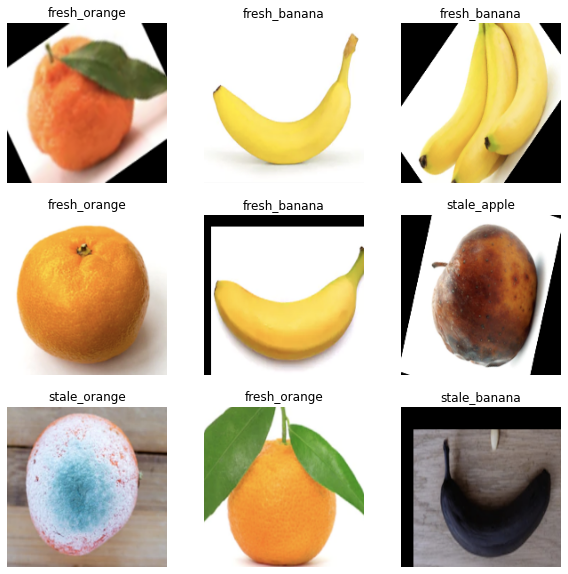

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9960785


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

In [ ]:
num_classes = 12

model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), strides=(1,1), activation="relu", input_shape=(180,180,3)),
    layers.BatchNormalization(axis=1),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      712       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 64)        0

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=9
)

Epoch 1/9
254/254 [==============================] - ETA: 0s - loss: 0.9423 - accuracy: 0.6311 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


254/254 [==============================] - 3506s 14s/step - loss: 0.9423 - accuracy: 0.6311 - val_loss: 0.6836 - val_accuracy: 0.8158
Epoch 2/9
254/254 [==============================] - 786s 3s/step - loss: 0.4613 - accuracy: 0.8413 - val_loss: 0.4287 - val_accuracy: 0.8670
Epoch 3/9
254/254 [==============================] - 783s 3s/step - loss: 0.3356 - accuracy: 0.8780 - val_loss: 0.3165 - val_accuracy: 0.9143
Epoch 4/9
254/254 [==============================] - 784s 3s/step - loss: 0.2668 - accuracy: 0.9026 - val_loss: 0.2395 - val_accuracy: 0.9256
Epoch 5/9
254/254 [==============================] - 787s 3s/step - loss: 0.2220 - accuracy: 0.9210 - val_loss: 0.1964 - val_accuracy: 0.9365
Epoch 6/9
254/254 [==============================] - 789s 3s/step - loss: 0.1988 - accuracy: 0.9287 - val_loss: 0.2216 - val_accuracy: 0.9394
Epoch 7/9
254/254 [==============================] - 791s 3s/step - loss: 0.1819 - accuracy: 0.9302 - val_loss: 0.1586 - val_accuracy: 0.9547
Epoch 8/9
254/

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img=image.load_img(path, target_size=(180, 180))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  fruit_list = ["Fresh Apple", "Fresh Banana", "Fresh Orange", "Stale Apple", "Stale Banana", "Stale Orange"]
  
  classes = model.predict(images, batch_size=32)
  print(fruit_list[np.argmax(classes)])
  print('Accuracy:', np.max(classes)*100, '%')

Saving apel.jpg to apel (4).jpg
Fresh Banana
Accuracy: 43.969446420669556 %


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

NameError: ignored

In [ ]:
model.save_weights("/content/gdrive/MyDrive/kaggle_dataset/model-agrostock11.h5")

In [ ]:
print('Saved model')

Saved model


In [ ]:
#Graphic
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

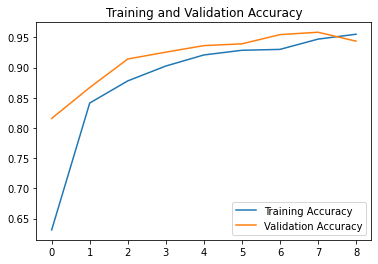

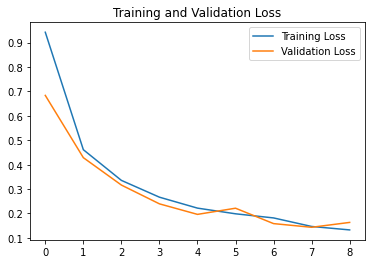

In [ ]:
epochs   = range(len(accuracy))

plt.plot  (epochs, accuracy, label='Training Accuracy')
plt.plot  (epochs, val_accuracy, label= 'Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title ('Training and Validation Accuracy')
plt.figure()

plt.plot  ( epochs, loss, label='Training Loss')
plt.plot  ( epochs, val_loss, label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title ('Training and Validation Loss')

In [ ]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

ValueError: ignored

In [ ]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

OSError: ignored

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

6589888